## Séries Temporais

### Complete guide to Time Series Forecasting (with Codes in Python)
- https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

### How to Check if Time Series Data is Stationary with Python
- https://machinelearningmastery.com/time-series-data-stationary-python/

### How to Create an ARIMA Model for Time Series Forecasting in Python
- https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

### Time Series Forecasting - ARIMA models - Towards Data Science
- https://towardsdatascience.com/time-series-forecasting-arima-models-7f221e9eee06

### ARIMA Model – Complete Guide to Time Series Forecasting in Python
- https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

### pmdarima: ARIMA estimators for Python
- https://www.alkaline-ml.com/pmdarima/

In [198]:
# importar pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
#import matplotlib.pyplot as plt

In [199]:
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [200]:
# carregar arquivo de dados de treino
data = pd.read_csv('weather-train.csv', index_col='date', parse_dates=['date'])

#print("Data Types:\n", data.dtypes)
#print("\nIndex:\n", data.index)

data.head()

,temperature
date,
2012-10-01,11.036840
2012-10-02,14.340558
2012-10-03,14.518382
2012-10-04,16.820351
2012-10-05,16.948431


In [201]:
data = data.dropna()

#data = data.resample('7D').mean()
data = data.resample('W').mean()
#data = data.resample('2W').mean()
#data = data.resample('15D').mean()
#data = data.resample('M').mean()

#data = data['2015-01':'2015-12']
#data = data['2013-01':'2014-12']
#data = data['2013-01':'2015-12']

data['temperature'] += 273.15

data.head()

,temperature
date,
2012-10-07,286.624154
2012-10-14,280.282641
2012-10-21,285.268254
2012-10-28,286.010448
2012-11-04,278.265557


In [202]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 216 entries, 2012-10-07 to 2016-11-20
Freq: W-SUN
Data columns (total 1 columns):
temperature    216 non-null float64
dtypes: float64(1)
memory usage: 3.4 KB


In [203]:
data.describe()

,temperature
count,216.000000
mean,285.830010
std,10.969908
min,260.033010
25%,277.275119
50%,287.076738
75%,295.180320
max,306.179648


In [204]:
ts = data['temperature']

ts.head()

date
2012-10-07    286.624154
2012-10-14    280.282641
2012-10-21    285.268254
2012-10-28    286.010448
2012-11-04    278.265557
Freq: W-SUN, Name: temperature, dtype: float64

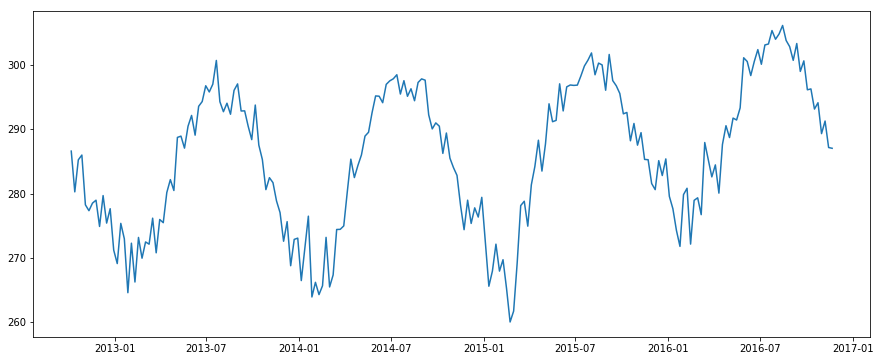

In [205]:
plt.plot(ts)

In [206]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(ts.values)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -5.262713
p-value: 0.000007


In [207]:
df = ts.to_frame()

In [208]:
from pmdarima.arima.utils import ndiffs

y = ts

## Adf Test
print('adf:', ndiffs(y, test='adf')) # 2

# KPSS test
print('kpss:', ndiffs(y, test='kpss')) # 0

# PP test:
print('pp:', ndiffs(y, test='pp')) # 2

adf: 1
kpss: 1
pp: 1


## Eliminating Trend and Seasonality

### Differencing

### Decomposing

## Forecasting a Time Series

In [209]:
pd.DataFrame({'orig': ts, 'diff': ts.diff(), 'diff7': ts.diff(7),
              '2diff': ts.diff().diff(), '3diff': ts.diff().diff().diff()}).tail(10)

,orig,diff,diff7,2diff,3diff
date,,,,,
2016-09-18,299.030253,-4.338635,-5.002767,-6.955592,-11.700671
2016-09-25,300.667537,1.637284,-4.185932,5.975919,12.931511
2016-10-02,296.168949,-4.498588,-10.010699,-6.135871,-12.111790
2016-10-09,296.304603,0.135654,-7.538335,4.634241,10.770113
2016-10-16,293.168801,-3.135802,-9.711253,-3.271456,-7.905697
2016-10-23,294.153770,0.984970,-6.598161,4.120771,7.392227
2016-10-30,289.346348,-4.807423,-14.022540,-5.792392,-9.913163
2016-11-06,291.307098,1.960751,-7.723154,6.768173,12.560565
2016-11-13,287.185468,-4.121630,-13.482069,-6.082381,-12.850554


In [210]:
seasonal = 52 #24 # 365 dias / período

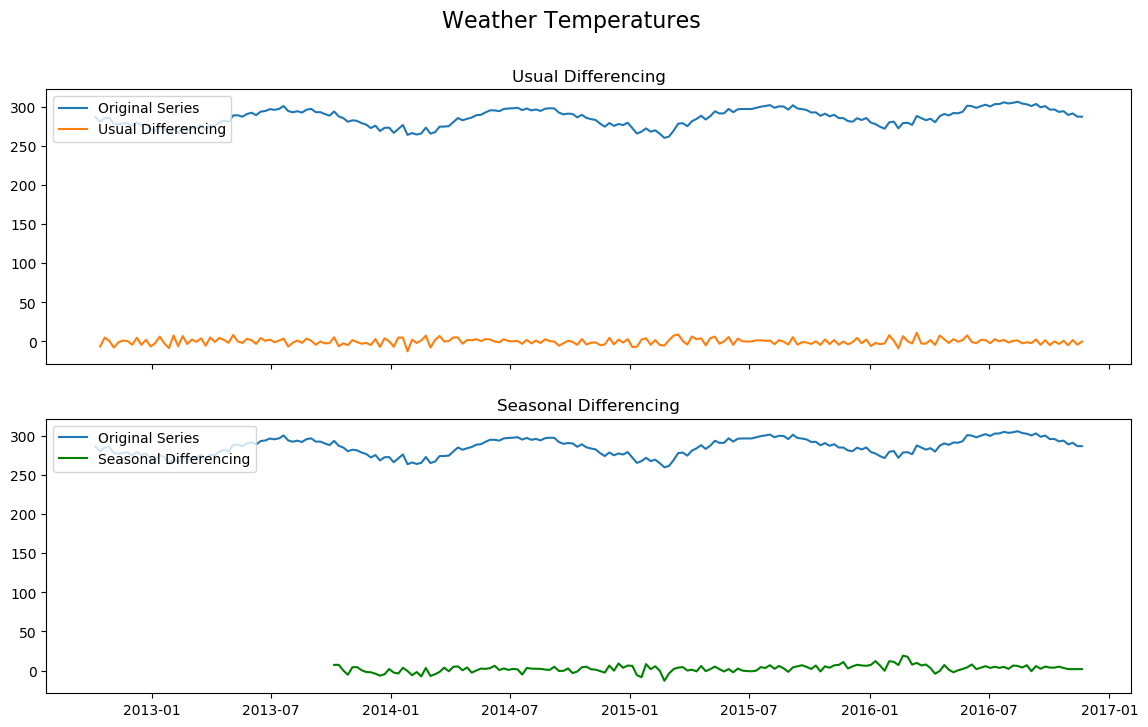

In [211]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(14,8), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(ts, label='Original Series')
axes[0].plot(ts.diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)

# Seasonal 1st
axes[1].plot(ts, label='Original Series')
axes[1].plot(ts.diff(seasonal), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Weather Temperatures', fontsize=16)
plt.show()

In [212]:
# Create Training and Test
corte = int(len(ts) * 0.7)
train = ts[:corte].dropna()
test = ts[corte:].dropna()
print(train.shape, test.shape)

(151,) (65,)


In [213]:
test.index

DatetimeIndex(['2015-08-30', '2015-09-06', '2015-09-13', '2015-09-20',
               '2015-09-27', '2015-10-04', '2015-10-11', '2015-10-18',
               '2015-10-25', '2015-11-01', '2015-11-08', '2015-11-15',
               '2015-11-22', '2015-11-29', '2015-12-06', '2015-12-13',
               '2015-12-20', '2015-12-27', '2016-01-03', '2016-01-10',
               '2016-01-17', '2016-01-24', '2016-01-31', '2016-02-07',
               '2016-02-14', '2016-02-21', '2016-02-28', '2016-03-06',
               '2016-03-13', '2016-03-20', '2016-03-27', '2016-04-03',
               '2016-04-10', '2016-04-17', '2016-04-24', '2016-05-01',
               '2016-05-08', '2016-05-15', '2016-05-22', '2016-05-29',
               '2016-06-05', '2016-06-12', '2016-06-19', '2016-06-26',
               '2016-07-03', '2016-07-10', '2016-07-17', '2016-07-24',
               '2016-07-31', '2016-08-07', '2016-08-14', '2016-08-21',
               '2016-08-28', '2016-09-04', '2016-09-11', '2016-09-18',
      

In [214]:
from pmdarima import auto_arima

# Seasonal - fit stepwise auto-ARIMA
smodel = auto_arima(ts, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=seasonal,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=False, 
                         stepwise=True)

smodel.summary()

Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds


/opt/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 0, 52); AIC=960.568, BIC=966.768, Fit time=8.422 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 1, 0, 52); AIC=914.211, BIC=926.610, Fit time=207.675 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 1, 0, 52); AIC=930.633, BIC=939.933, Fit time=23.197 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(2, 1, 0, 52); AIC=898.959, BIC=914.458, Fit time=713.914 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(2, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(2, 1, 0, 52); AIC=904.998, BIC=917.397, Fit time=540.623 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(2, 1, 0, 52); AIC=899.676, BIC=918.275, Fit time=863.770 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(2, 1, 0, 52); AIC=896.916, BIC=915.515, Fit time=1111.320 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(2, 1, 0, 52

MemoryError: 

In [ ]:
# Forecast
n_periods = seasonal #52 #24 #12 # 1 ano
freq = 'W' #'2W' #'15D' #'M' # mês
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data.index[-1], periods=n_periods, freq=freq)

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of Weather Temperatures")
plt.show()

In [ ]:
ts.tail()

In [ ]:
dates_2w = pd.date_range(start=ts.index[-1]+1, end='2018-01-01', freq=freq)
dates_2w

In [ ]:
n_periods = len(dates_2w)
#freq = '2W'
fitted = smodel.predict(n_periods=n_periods)
fitted

In [ ]:
len(dates_2w)

In [ ]:
len(fitted)

In [ ]:
df = pd.DataFrame({
    'date': dates_2w,
    'temperature': fitted
})
df.set_index('date', inplace=True)
df.info()
df.head()

In [ ]:
df = (data.iloc[-2:]).append(df)
df.info()

In [ ]:
real_data = pd.read_csv('weather-solution.csv', index_col='date', parse_dates=['date'])
real_data.head()

In [ ]:
df2 = df.resample('D').interpolate(method='cubic')

start = real_data.index[0]
df2 = df2[start:'2017-11-29']

df2['temperature'] -= 273.15

df2.info()
df2.head()

In [ ]:
plt.plot(df2)
plt.plot(real_data)

In [ ]:
df2.to_csv('weather-submission-arima2.csv')